# Model 4 - Pinchout

Forcing GemPy to create a layer of varying thickness. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

../..\gempy\posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/examples/input_data/model4_orientations.csv",
                        path_i = os.pardir+"/examples/input_data/model4_surface_points.csv") 

../..\gempy\data_management.py:1267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  values = np.vstack(map(np.ravel, g)).T.astype("float32")


In [3]:
geo_data.get_data()

X      Y      Z formation          series  \
interfaces   0      0.0  200.0  300.0     rock1  Default series   
             1      0.0  800.0  300.0     rock1  Default series   
             2    500.0  200.0  375.0     rock1  Default series   
             3    500.0  800.0  375.0     rock1  Default series   
             4   1000.0  200.0  450.0     rock1  Default series   
             5   1000.0  800.0  450.0     rock1  Default series   
             6      0.0  200.0  700.0     rock2  Default series   
             7      0.0  800.0  700.0     rock2  Default series   
             8    500.0  200.0  625.0     rock2  Default series   
             9    500.0  800.0  625.0     rock2  Default series   
             10  1000.0  200.0  550.0     rock2  Default series   
             11  1000.0  800.0  550.0     rock2  Default series   
             12     0.0    0.0    0.0  basement  Default series   
orientations 3    500.0  500.0  375.0     rock1  Default series   
             4    500.0  200.0  375.0     rock1  Default series   
             5    500.0  800.0  375.0     rock1  Default series   
             0    500.0  500.0  625.0     rock2  Default series   
             1    500.0  200.0  625.0     rock2  Default series   
             2    500.0  800.0  625.0     rock2  Default series   

                 formation_number  order_series  isFault     G_x  \
interfaces   0                  1             1    False     NaN   
             1                  1             1    False     NaN   
             2                  1             1    False     NaN   
             3                  1             1    False     NaN   
             4                  1             1    False     NaN   
             5                  1             1    False     NaN   
             6                  2             1    False     NaN   
             7                  2             1    False     NaN   
             8                  2             1    False     NaN   
             9                  2             1    False     NaN   
             10                 2             1    False     NaN   
             11                 2             1    False     NaN   
             12                 3             1    False     NaN   
orientations 3                  1             1    False -0.1485   
             4                  1             1    False -0.1485   
             5                  1             1    False -0.1485   
             0                  2             1    False  0.1485   
             1                  2             1    False  0.1485   
             2                  2             1    False  0.1485   

                          G_y       G_z     dip  azimuth  polarity  
interfaces   0            NaN       NaN     NaN      NaN       NaN  
             1            NaN       NaN     NaN      NaN       NaN  
             2            NaN       NaN     NaN      NaN       NaN  
             3            NaN       NaN     NaN      NaN       NaN  
             4            NaN       NaN     NaN      NaN       NaN  
             5            NaN       NaN     NaN      NaN       NaN  
             6            NaN       NaN     NaN      NaN       NaN  
             7            NaN       NaN     NaN      NaN       NaN  
             8            NaN       NaN     NaN      NaN       NaN  
             9            NaN       NaN     NaN      NaN       NaN  
             10           NaN       NaN     NaN      NaN       NaN  
             11           NaN       NaN     NaN      NaN       NaN  
             12           NaN       NaN     NaN      NaN       NaN  
orientations 3   9.999909e-13  0.988912  351.46     90.0       1.0  
             4   9.999909e-13  0.988912  351.46     90.0       1.0  
             5   9.999909e-13  0.988912  351.46     90.0       1.0  
             0   1.000009e-12  0.988912    8.54     90.0       1.0  
             1   1.000009e-12  0.988912    8.54     90.0       1.0  
         

Setting and ordering the units and series:

In [4]:
gp.set_series(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')},
              order_series = ['Strat_Series','Basement_Series'],
              order_formations=np.array(['rock2','rock1','basement']), verbose=0)

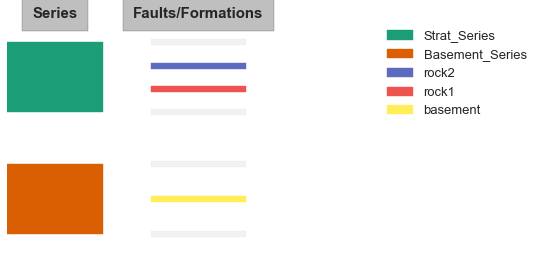

In [5]:
#%matplotlib inline
gp.get_sequential_pile(geo_data)

In [6]:
%matplotlib inline
#gp.plotting.plot_data(geo_data, direction='y')

Calculating the model:

In [7]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [8]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Displaying the result in x and y direction:

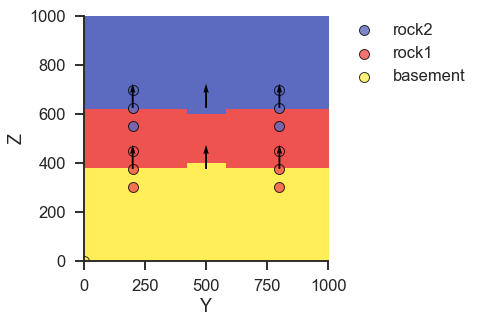

In [9]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='x', plot_data=True)

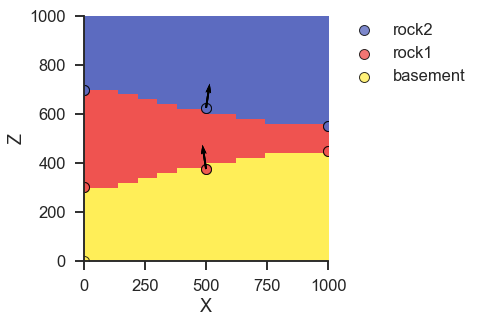

In [10]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='y', plot_data=True)